In [1]:
import os
import subprocess
import numpy as np
import tqdm
import time
import datetime

#if you want to display images as you record
import cv2
import matplotlib.pyplot as plt

import sys

from pyk4a import *

from top_bottom_triggered.video_io import *
from top_bottom_triggered.multicam_utils import *

In [50]:
# 'bottom': '000343492012',  # old bottom
# 'bottom': '000693321712',  # new bottom

# 000364192012  # old top
# # new top
serial_numbers = {
    'top': '000516221712'
}

In [53]:
# set recording params

recording_length = int(10*60)
master = 'top'  # don't change (should be top)
subject = 'trigger_test' # mouse, or calibration
suffix = ''

date = datetime.datetime.now().strftime('%Y%m%d')
# path = R'D:\Jonah\Thermistor_recordings\{subject}\{date}_{subject}'
path = '/home/dattalab4/Desktop/23_1_24_basler_6cam/JP_testing/{subject}/{date}_{subject}'
path = path.format(subject=subject, date=date)
file_prefix = os.path.join(path, f'{date}_{subject}' + suffix)
if not os.path.exists(path):
    os.makedirs(path)
    print(f'Created path {path}')
else:
    print(f'{path} exists!')

print()
print(f'File will be saved to: {file_prefix}.XYZ')

print()
camera_indexes = get_camera_indexes(serial_numbers)
print(camera_indexes)

/home/dattalab4/Desktop/23_1_24_basler_6cam/JP_testing/trigger_test/20230313_trigger_test exists!

File will be saved to: /home/dattalab4/Desktop/23_1_24_basler_6cam/JP_testing/trigger_test/20230313_trigger_test/20230313_trigger_test.XYZ

Index:0	Serial:000516221712	Color:1.6.110	Depth:1.6.80
{'top': 0}


libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind


In [54]:
#spacer

In [55]:
#spacer

In [57]:
# run this cell to record!

record_processes = {}
sync_delay,sync_delay_step = 0,500

for camera,ix in camera_indexes.items():
    if camera==master:
        k4a = PyK4A(Config(color_resolution=ColorResolution.OFF,  # RES_720P
                           depth_mode=DepthMode.NFOV_UNBINNED,
                           synchronized_images_only=False,
                           wired_sync_mode=WiredSyncMode.SUBORDINATE), device_id=ix)
        
        p = Process(target=capture_from_azure, 
                    args=(k4a, file_prefix+'.'+camera ,recording_length),
                    kwargs={'display_time': True,
                            'display_frames':True,
                            'externally_triggered': True})
        
    else:
        sync_delay += sync_delay_step
        k4a = PyK4A(Config(color_resolution=ColorResolution.OFF,
                           depth_mode=DepthMode.NFOV_UNBINNED,
                           synchronized_images_only=False,
                           wired_sync_mode=WiredSyncMode.SUBORDINATE,
                           subordinate_delay_off_master_usec=sync_delay), device_id=ix)

        p = Process(target=capture_from_azure, 
                    args=(k4a, file_prefix+'.'+camera ,recording_length+5),
                    kwargs={'display_time': camera==False})

    record_processes[camera] = p

    
for camera in camera_indexes:
    if camera != master:
        record_processes[camera].start()
time.sleep(2)
record_processes[master].start()
print('Master started...waiting for trigger...')

exit_codes = [p.join() for p in record_processes.values()]
print('Finished recording')

device_timestamps = [np.load(f'{file_prefix}.{cam}.device_timestamps.npy') for cam in serial_numbers]
print(len(device_timestamps[0]))

# print(len(device_timestamps[0]),len(device_timestamps[1]))
# matched_timestamps = kinect_azure_match_frames(device_timestamps)
# np.save(f'{file_prefix}.matched_timestamps.npy', matched_timestamps)
# print("got",len( matched_timestamps), 'matched_frames,expected=', 30*recording_length)

Master started...waiting for trigger...
awaiting first capture (trigger)...
First frame captured (trigger received)
Recorded 599 out of 600 seconds - Frame rate =  30.005226939851664
Finished recording
18004


libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotp

In [ ]:
plt.hist(np.diff(device_timestamps[0]),bins=10)
plt.hist(np.diff(device_timestamps[1]),bins=10)

In [7]:
sum(np.diff(device_timestamps[1])>40000)

0

In [8]:
sum(np.diff(device_timestamps[0])>40000)

1

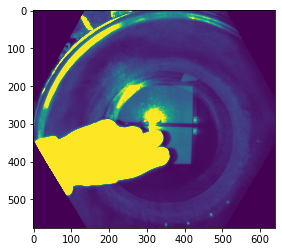

In [9]:
#import matploli
depth = read_frames(file_prefix+'.top.ir.avi', [101], pixel_format='gray16').squeeze()
plt.imshow(depth, vmax=1000)

